In [1]:
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Ray bundle:

Polar coordinates ray bundle
* radius 12.5m
* 5 rays accros the radius
* 8 rays on the azimuths

In [2]:
src = ceo.Source("R")
D = 26
nPx = 501
radius = D
n_radius = nPx
src  = ceo.Source("R",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])

In [3]:
gmt = ceo.GMT_MX(D,nPx)
src.reset()
gmt.propagate(src)
wfe = src.phase.host(units='nm')

### Aperture

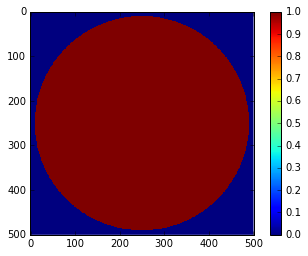

In [4]:
src.reset()
A = ceo.Aperture(25.0,0.0,n_radius)
A.vignetting(src.rays)
P = src.rays.vignetting.host().T
imshow(np.reshape(P,(n_radius,n_radius)),interpolation='none')
colorbar()

### M1

GMT M1 definition:
* curvature radius: 36m
* conic constant: 1-0.9982857

In [5]:
M1 = ceo.Conic(1.0/36.0,1-0.9982857)

### Reflection from M1

In [6]:
ceo.Transform_to_S(src,M1)
ceo.Intersect(src,M1)
ceo.Reflect(src)
ceo.Transform_to_R(src,M1)

### M2

GMT M1 definition:
* curvature radius: 4.1639009m
* conic constant: 1-0.71692784

In [7]:
M2 = ceo.Conic(-1.0/4.1639009,1-0.71692784,
               origin=[0.0,0.0,20.26247614],
               euler_angles=[0.0,0.0*math.pi/180/3600,0.0])

### Reflection from M2

In [8]:
ceo.Transform_to_S(src,M2)
ceo.Intersect(src,M2)
ceo.Reflect(src)
ceo.Transform_to_R(src,M2)

In [9]:
src.rays.to_sphere(focal_plane_distance=-5.830,
                   focal_plane_radius=2.197173)

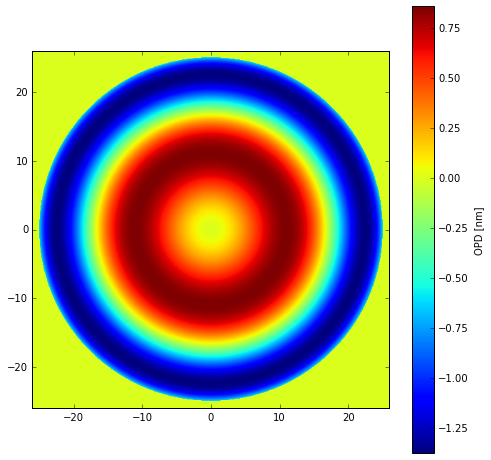

In [10]:
opd = src.rays.optical_path_difference.host(units='nm').reshape(nPx,nPx)
from matplotlib import cm
fig = plt.figure(figsize=(8,8))
ext = (-radius,radius,-radius,radius)
ax = imshow(opd,extent=ext)
h = fig.colorbar(ax)
h.set_label('OPD [nm]')

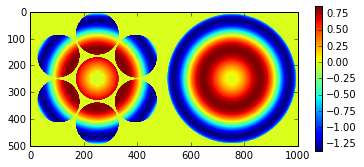

In [11]:
src.opd2phase()
imshow(np.concatenate((wfe,src.phase.host(units='nm')),axis=1))
colorbar(shrink=0.65)